In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

automobile_data = pd.read_csv('archive/automobile_processed.csv')
automobile_data.head()

,Unnamed: 0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,2,164.0,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.4,10.0,102.0,5500.0,24,30,13950.0
1,4,2,164.0,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.4,8.0,115.0,5500.0,18,22,17450.0
2,6,1,158.0,audi,gas,std,four,sedan,fwd,front,...,136,mpfi,3.19,3.4,8.5,110.0,5500.0,19,25,17710.0
3,8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,...,131,mpfi,3.13,3.4,8.3,140.0,5500.0,17,20,23875.0
4,10,2,192.0,bmw,gas,std,two,sedan,rwd,front,...,108,mpfi,3.50,2.8,8.8,101.0,5800.0,23,29,16430.0


In [2]:
automobile_subset = automobile_data[['horsepower','city-mpg','highway-mpg','price']]

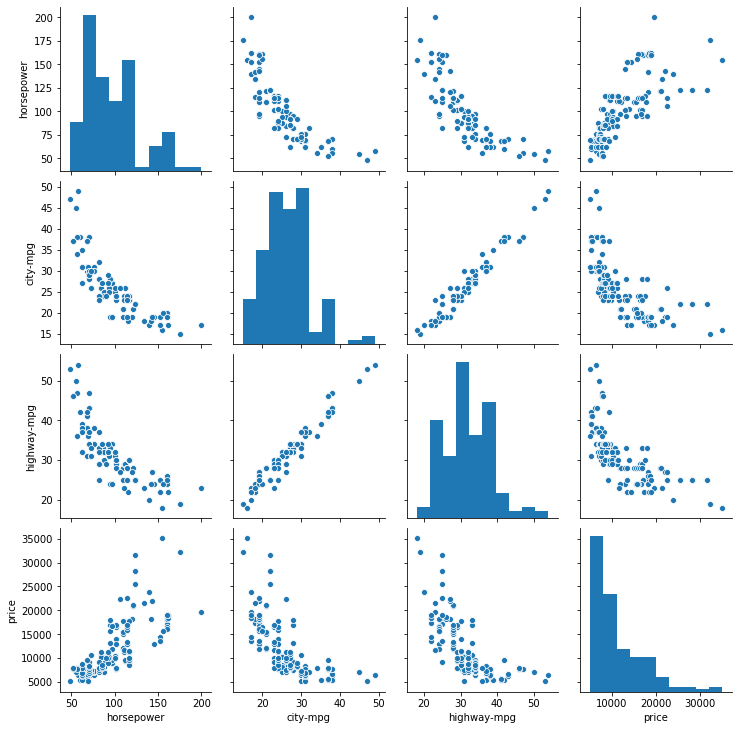

In [3]:
sns.pairplot(automobile_subset)

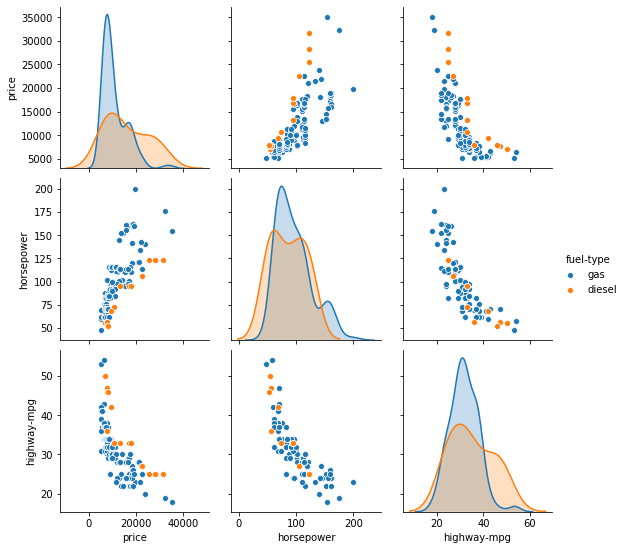

In [5]:
sns.pairplot(automobile_data,hue='fuel-type',vars=['price','horsepower','highway-mpg'])

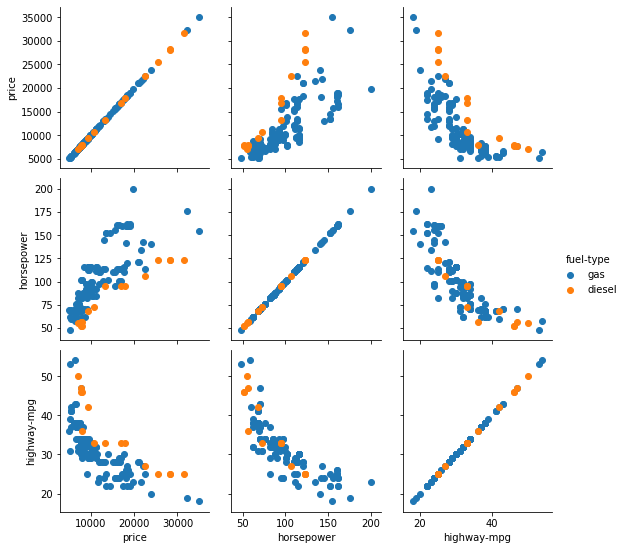

In [6]:
g = sns.PairGrid(automobile_data,vars=['price','horsepower','highway-mpg'],hue='fuel-type')

g.map(plt.scatter)
g.add_legend()

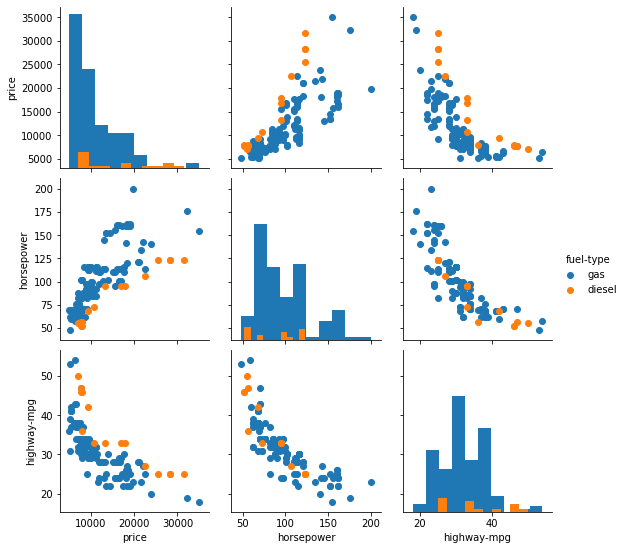

In [7]:
g = sns.PairGrid(automobile_data,vars=['price','horsepower','highway-mpg'],hue='fuel-type')

g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()

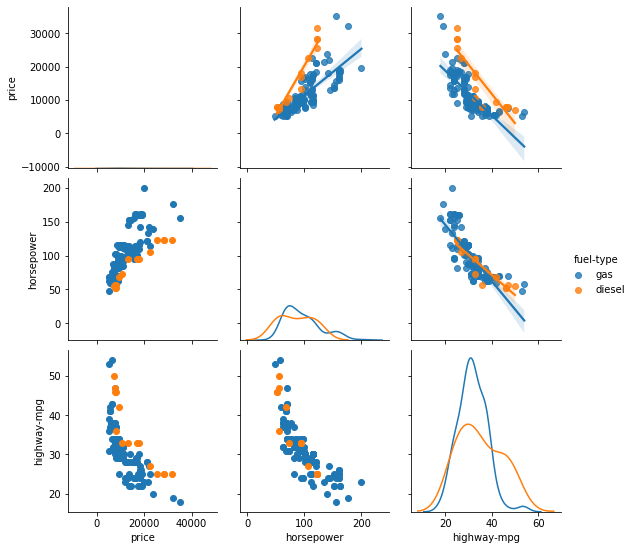

In [8]:
g = sns.PairGrid(automobile_data,vars=['price','horsepower','highway-mpg'],hue='fuel-type')


g.map_lower(plt.scatter)
g.map_diag(sns.kdeplot,)
g.map_upper(sns.regplot)
g.add_legend()

In [9]:
automobile_corr = automobile_data[['engine-size','horsepower','peak-rpm','city-mpg',
                                  'highway-mpg','price']].corr()
automobile_corr

,engine-size,horsepower,peak-rpm,city-mpg,highway-mpg,price
engine-size,1.000000,0.812073,-0.284686,-0.699139,-0.714095,0.841496
horsepower,0.812073,1.000000,0.074057,-0.837214,-0.827941,0.759874
peak-rpm,-0.284686,0.074057,1.000000,-0.052929,-0.032777,-0.171916
city-mpg,-0.699139,-0.837214,-0.052929,1.000000,0.971999,-0.692273
highway-mpg,-0.714095,-0.827941,-0.032777,0.971999,1.000000,-0.720090
price,0.841496,0.759874,-0.171916,-0.692273,-0.720090,1.000000


Text(0.5, 1, 'Automobile')

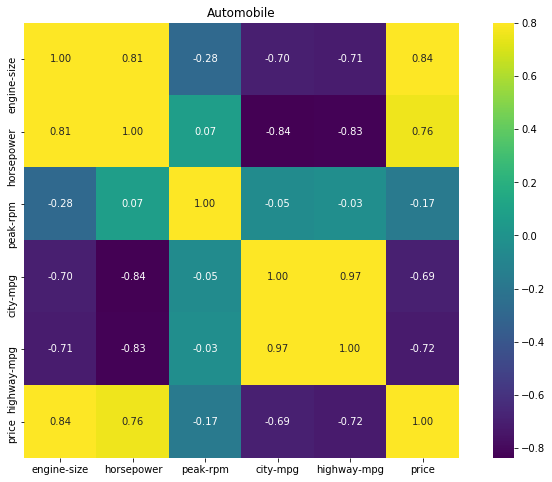

In [17]:
plt.figure(figsize=(12,8))

sns.heatmap(automobile_corr,vmax=0.8,square=True,annot=True,fmt='.2f',cmap='viridis')

plt.title('Automobile')